In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

## Missing data

**Common methods to deal with missing data:**

* Remove rows or columns containing missing data;
* Impute with mean or median;
* Impute with mode (most frequently occuring feature);
* Impute with forward or backward fill;
* Interpolate data between two points.

Impute with forward or backward fill:

This method involves filling missing values with the previous (backward fill) or next (forward fill) valid observation in the dataset. This method is often used in time series data or other sequential data where there is some logical order to the observations. It assumes that the missing values can be reasonably estimated by the adjacent values. For example, if you have a time series of daily temperatures and a temperature value is missing for a particular day, you can use the temperature from the previous day (backward fill) or the next day (forward fill) to fill in the missing value.

Interpolate data between two points:

Interpolation is a technique for estimating missing values based on the values of neighboring data points. It's particularly useful when dealing with continuous data, such as time series or spatial data. Instead of simply using the previous or next value like forward or backward fill, interpolation methods use mathematical algorithms to estimate missing values based on the surrounding data points. Common interpolation methods include linear interpolation, cubic spline interpolation, and polynomial interpolation. These methods provide a more sophisticated way to estimate missing values and can be especially useful when the relationship between data points is not linear.

In [3]:
df = pd.DataFrame(np.random.randn(10,4), columns = ["A", "B", "C", "D"])

df = df[df>0]

df

,A,B,C,D
0,NaN,NaN,0.619825,NaN
1,NaN,NaN,NaN,NaN
2,1.738846,NaN,0.332821,0.557039
3,0.735444,0.415143,0.308439,0.303139
4,NaN,0.525492,0.328799,NaN
5,0.032607,NaN,NaN,NaN
6,0.635062,NaN,NaN,NaN
7,0.851339,NaN,NaN,0.420719
8,0.813044,NaN,NaN,NaN
9,NaN,NaN,1.370500,1.117667


In [4]:
copy = df.copy()
copy.drop(columns = "D", inplace = True)

## dropna

Removes rows (default), or columns, containing null.

**Parameters**

***dataframe.dropna(axis, how, thresh, subset, inplace)***

* **how** = "any" (default) or "all". Optional. Specifies whether to remove the row or column when ALL values are NULL, or if ANY value is NULL.
* **thresh** = specifies the minimum number of non-NA values in row/column in order for it to remain in the dataset. Any row/column with the number of non-NA values < thresh value is removed irrespective of other parameters passed. When thresh=none, this filter is ignored.
* **subset** Takes a list of columns/rows respectively (opposite to the axis) which are to be searched for null/NA values instead of an entire list of columns/rows.
* **axis** "index" (default) or "columns". Optional, default 0.
0 or 'index'removes ROWS that contain NULL values
1 or 'columns' removes COLUMNS that contain NULL values

In [6]:
copy

,A,B,C
0,NaN,NaN,0.619825
1,NaN,NaN,NaN
2,1.738846,NaN,0.332821
3,0.735444,0.415143,0.308439
4,NaN,0.525492,0.328799
5,0.032607,NaN,NaN
6,0.635062,NaN,NaN
7,0.851339,NaN,NaN
8,0.813044,NaN,NaN
9,NaN,NaN,1.370500


In [9]:
copy.dropna(axis = "columns", subset = 2) # looks for NaN in the third row and removes the column with NaN in this row

,A,C
0,NaN,0.619825
1,NaN,NaN
2,1.738846,0.332821
3,0.735444,0.308439
4,NaN,0.328799
5,0.032607,NaN
6,0.635062,NaN
7,0.851339,NaN
8,0.813044,NaN
9,NaN,1.370500


## fillna

Fills in missing values

***DataFrame.fillna(self, value=None, method=None, axis=None, inplace=False, limit=None, downcast=None)***

Method: The method parameter represents the technique that needs to be used for filling the Nan’s in the dataframe. 
Limit: This mentions the overall number of Nan values that are allowed to be filled backward and forward.  
Downcast: How to downcast a given value from its currently specified datatype if it is possible to be performed.

In [15]:
copy = df.copy()
copy

,A,B,C,D
0,NaN,NaN,0.619825,NaN
1,NaN,NaN,NaN,NaN
2,1.738846,NaN,0.332821,0.557039
3,0.735444,0.415143,0.308439,0.303139
4,NaN,0.525492,0.328799,NaN
5,0.032607,NaN,NaN,NaN
6,0.635062,NaN,NaN,NaN
7,0.851339,NaN,NaN,0.420719
8,0.813044,NaN,NaN,NaN
9,NaN,NaN,1.370500,1.117667


In [20]:
# copy.fillna(44545, inplace = True) # fills every NA in the dataframe with value 44545
copy["A"].fillna(copy["A"].median(), inplace = True)
copy["B"].ffill(inplace=True) #forward fill
copy["D"].bfill(inplace = True) #backward fill
copy["C"].interpolate(inplace = True)

copy

,A,B,C,D
0,0.774244,NaN,0.619825,0.557039
1,0.774244,NaN,0.476323,0.557039
2,1.738846,NaN,0.332821,0.557039
3,0.735444,0.415143,0.308439,0.303139
4,0.774244,0.525492,0.328799,0.420719
5,0.032607,0.525492,0.537139,0.420719
6,0.635062,0.525492,0.745479,0.420719
7,0.851339,0.525492,0.953819,0.420719
8,0.813044,0.525492,1.162160,1.117667
9,0.774244,0.525492,1.370500,1.117667


In [21]:
copy = df.copy()
copy

,A,B,C,D
0,NaN,NaN,0.619825,NaN
1,NaN,NaN,NaN,NaN
2,1.738846,NaN,0.332821,0.557039
3,0.735444,0.415143,0.308439,0.303139
4,NaN,0.525492,0.328799,NaN
5,0.032607,NaN,NaN,NaN
6,0.635062,NaN,NaN,NaN
7,0.851339,NaN,NaN,0.420719
8,0.813044,NaN,NaN,NaN
9,NaN,NaN,1.370500,1.117667


In [23]:
copy["is NA"] = copy["A"].isna()
copy

,A,B,C,D,is NA
0,NaN,NaN,0.619825,NaN,True
1,NaN,NaN,NaN,NaN,True
2,1.738846,NaN,0.332821,0.557039,False
3,0.735444,0.415143,0.308439,0.303139,False
4,NaN,0.525492,0.328799,NaN,True
5,0.032607,NaN,NaN,NaN,False
6,0.635062,NaN,NaN,NaN,False
7,0.851339,NaN,NaN,0.420719,False
8,0.813044,NaN,NaN,NaN,False
9,NaN,NaN,1.370500,1.117667,True


In [25]:
copy["A"].bfill(inplace = True)
copy

,A,B,C,D,is NA
0,1.738846,NaN,0.619825,NaN,True
1,1.738846,NaN,NaN,NaN,True
2,1.738846,NaN,0.332821,0.557039,False
3,0.735444,0.415143,0.308439,0.303139,False
4,0.032607,0.525492,0.328799,NaN,True
5,0.032607,NaN,NaN,NaN,False
6,0.635062,NaN,NaN,NaN,False
7,0.851339,NaN,NaN,0.420719,False
8,0.813044,NaN,NaN,NaN,False
9,NaN,NaN,1.370500,1.117667,True


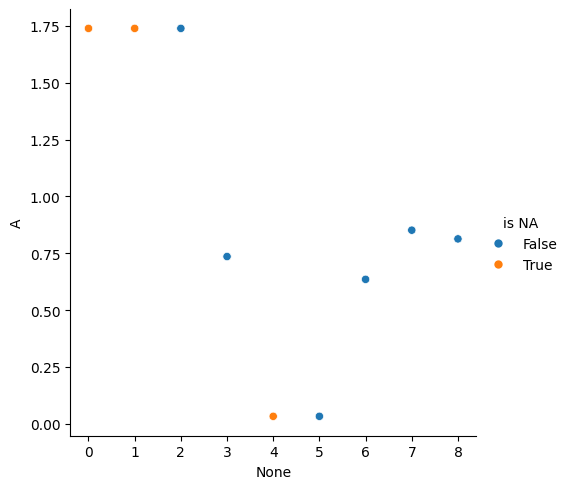

In [27]:
sns.relplot(x = copy.index, y="A", hue="is NA", data = copy)